In [54]:
import sys
import os
import re
from os.path import isfile, join
import pandas as pd
##Doc2Vec
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
#t-SNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
#DBScan
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
## Path to text files
path = "/home/kbari/git_repo/FinanceErdosProj/PyMuPdf_Text/"
path1 = "/home/kbari/git_repo/FinanceErdosProj/Tesseract_Text/"

## Load from txt from files to a dataframe; Other information to include possibly?

#pd.read_table(file,header=None,quotechar=None,quoting=3,error_bad_lines=False) for file in DIR]
def txt_to_df(path):
    ''' Put all txt files into single dataframe'''
    DIR = os.listdir(path)
    raw_df_lst = []
    for i in range(len(DIR)):
        with open(path+DIR[i],encoding = "ISO-8859-1") as f:
            lines = f.readlines()
            data = '\n'.join(map(str,lines))
            print(DIR[i])
            p = proj_desc_preprocess(data)
            if p is not None:
                p = p.replace("\n","")
                l = len(p)
            else:
                l = 0
            di= pd.DataFrame([data,p,int(l)],index=['raw_text','proj_desc','num_char'],columns=[DIR[i]]).T
            raw_df_lst.append(di)
    #print(len(raw_df_lst))
    df_raw = pd.concat(raw_df_lst)
    return df_raw

## Grab Project Description   
def proj_desc_preprocess(text):
    ''' Grab Project Description'''
    if len(re.findall('Project Description',text,re.IGNORECASE)) > 0:
        start = 'Project Description'
        end = 'SCHEDULE'
        try:
            return text.split(start)[1].split(end)[0]
        except:
            return None
    elif len(re.findall('Description of the Project',text,re.IGNORECASE)) > 0:
        start = 'Description of the Project'
        end = 'SCHEDULE'
        try:
            return text.split(start)[1].split(end)[0]
        except:
            return None
    elif len(re.findall('Program Actions',text,re.IGNORECASE)) > 0:
        start = 'Program Actions'
        end = 'Section II'
        try:
            return text.split(start)[1].split(end)[0]
        except:
            return None
    elif len(re.findall('Schedule 3',text,re.IGNORECASE)) > 0:
        start = 'SCHEDULE 3'
        #end = 'SCHEDULE 3'
        try:
            return text.split(start)[1]
        except:
            return None
    elif len(re.findall('Schedule III',text,re.IGNORECASE)) > 0:
        start = 'SCHEDULE III'
        #end = 'SCHEDULE 3'
        try:
            return text.split(start)[1]
        except:
            return None
    else:
        print('CASE 4')
        return None


In [3]:
df = txt_to_df(path)
df1 = txt_to_df(path1)
dF = pd.concat([df,df1])

2006_july_4_213051468296429321_loan-agreement-l4825-ro-conformed.txt
1996_december_13_893741468282540693_conformed-copy--l4113--public-finance-management-project--loan-agreement.txt
1994_september_30_745841468259144739_conformed-copy--l3792--land-administration-project--loan-agreement.txt
1990_june_22_418341468249703395_conformed-copy--l3188--housing-project--loan-agreement.txt
2009_june_11_345301468026058559_loan-agreement-l7686-cr-conformed.txt
1998_april_8_828001468332701640_conformed-copy--l4301--early-childhood-development-project--loan-agreement.txt
2007_april_16_917181468025771221_loan-agreement--l7434-co--conformed.txt
1997_june_25_702941468094153972_conformed-copy--l4203--social-protection-adjustment-loan--loan-agreement.txt
2011_december_13_303021468123575214_loan-agreement-for-loan-8004-mx-conformed.txt
1995_january_30_863491468145153420_conformed-copy--l3808--financial-sector-deepening-and-intermediation-project--loan-agreement.txt
1991_september_16_374721468231304302_confo

1994_november_3_391431468284330990_conformed-copy--l3793--ports-development-and-environmental-improvement-project--loan-agreement.txt
2007_february_28_483331468230943372_loan-agreement-for-l4844-cn-conformed.txt
2005_july_18_418791468274224088_loan-agreement,-loan-7314-ma-conformed.txt
2009_november_18_551031468247465266_loan-agreement-for-loan-7779-do-conformed.txt
2006_december_21_341131468050982864_loan-agreement-l7416-mu-conformed.txt
1997_december_18_959991468092100530_conformed-copy--l4262--second-coal-sector-adjustment-loan--loan-agreement.txt
2017_june_23_880321498676803997_official-documents-loan-agreement-for-loan-8768-jo-and-cff-tf0a5308-closing-package.txt
2014_february_27_857061468019432658_official-documents-loan-agreement,-l8321-cn-closing-package.txt
1993_august_12_191751468259144485_conformed-copy--l3629--water-supply-and-sanitation-for-low-income-communities-project--loan-agreement.txt
2005_july_14_351151468068933002_loan-agreement,-l4775-gd-conformed.txt
2012_decembe

2011_august_17_440161468248711034_loan-agreement-for-loan-8086-hr-conformed.txt
1990_january_5_658601468273303198_conformed-copy--l3142--industry-and-trade-policy-adjustment-loan--loan-agreement.txt
2019_november_15_998601575663138900_official-documents-loan-agreement-for-loan-8976-id-closing-package.txt
2014_september_3_766271468253738436_official-documents-loan-agreement-for-loan-8405-jm-closing-package.txt
2014_september_3_880431468042834319_official-documents-loan-agreement-for-loan-8406-jm-closing-package.txt
2007_june_11_953651468247284951_loan-agreement-l7450-hr-conformed.txt
1991_november_7_683961468031513598_conformed-copy--l3398--southeast-coast-paralimni-sewerage-and-drainage-project--loan-agreement-1.txt
1995_january_11_147341468259145033_conformed-copy--l3825--second-professional-human-resource-development--loan-agreement.txt
2014_november_25_338131468240858079_official-documents-loan-agreement,-l8424-cn-closing-package.txt
2019_march_5_717521559076106349_official-document

2010_november_24_297631468050330169_loan-agreement-for-loan-7931-kz-conformed.txt
2009_september_9_981351468225884374_loan-agreement-for-l7707-cn-conformed.txt
1995_february_14_666831468099555905_paraguay--asuncion-sewerage-project-_-loan-3842--loan-agreement--conformed.txt
1994_february_8_230301468046815072_macedonia--economic-recovery-loan-_-loan-3703--loan-agreement--conformed.txt
2009_november_2_594001468253511669_loan-agreement,-l7769-jm-conformed.txt
2008_january_16_587521468012050845_loan-agreement,-l4876-by-conformed.txt
2016_may_26_774471468428068115_official-documents-loan-agreement-for-loan-8613-cn-closing-package.txt
2003_may_28_709481468018590128_conformed-copy--l7167--programmatic-financial-sector-adjustment-loan--loan-agreement.txt
CASE 4
2012_february_17_718411468282535095_official-documents-loan-agreement-for-loan-8121-id-closing-package.txt
2006_august_28_733321468052807826_loan-agreement,-l4837-in-conformed.txt
CASE 4
2009_march_6_657301468029703818_loan-agreement,-l

2010_june_17_302121468231887349_loan-agreement-for-loan-7882-cn-conformed.txt
2017_december_11_545801516378212047_official-documents-loan-agreement-for-loan-8777-cn-closing-package.txt
1997_july_18_802371468294102136_conformed-copy--l4185--bureau-of-economic-analysis-project--loan-agreement.txt
2009_september_18_897201468246048599_loan-agreement,-l7680-do-conformed.txt
1996_july_2_836891468175483553_conformed-copy--l4037--industry-support-institutions-upgrading-project--loan-agreement.txt
1990_march_16_762811468295511627_conformed-copy--l3164--energy-sector-project--pnoc-loan-agreement.txt
1990_april_24_668811468165272290_conformed-copy--c2120--water-supply-project--loan-agreement.txt
CASE 4
2002_may_29_327551468103760478_conformed-copy--l7098--social-benefits-reform-administration-project--loan-agreement.txt
2002_july_31_691591468092355908_conformed-copy--l4662--treasury-development-project--loan-agreement.txt
1998_june_29_919041468310488546_conformed-copy--l4357--transport-sector-pro

1998_march_16_906951468122369422_conformed-copy--l4278--second-agricultural-sector-investment-loan--loan-agreement.txt
2002_march_24_817821468238170601_conformed-copy--l7107--tuberculosis-control-project--loan-agreement.txt
2010_june_3_441041468200958010_loan-agreement-for-loan-7896-ba-conformed.txt
1991_july_5_694741468035355930_conformed-copy--l3347--second-structural-adjustment-loan--loan-agreement.txt
1999_june_17_975471468094790343_conformed-copy--l4491--private-sector-institution-building-project--loan-agreement.txt
2018_april_6_372801525207622293_official-documents-loan-agreement-for-loan-8829-in-closing-package.txt
2014_july_16_538501468292209635_official-documents-loan-agreement,-loan-tf017101-closing-package.txt
2018_july_10_412281531858463283_official-documents-loan-agreement-for-loan-8660-gt-closing-package.txt
2001_july_27_718281468033542866_conformed-copy--l4622--grand-trunk-road-improvement-project--loan-agreement.txt
2018_january_19_410861517005406765_official-documents

2016_august_31_894681474385269787_official-documents-loan-agreement-for-loan-8620-pk-closing-package.txt
1998_may_1_853451468267593260_conformed-copy--l4307--northern-sumatra-region-road-project--loan-agreement.txt
1990_october_23_719821468253857318_conformed-copy--c2179--andhra-pradesh-cyclone-emergency-reconstruction-project--loan-agreement.txt
CASE 4
2012_february_24_214011468002081691_official-documents-loan-agreement-for-loan-8129-am-closing-package.txt
2003_august_28_379951468261243257_conformed-copy--l4697--earthquake-emergency-recovery-project--loan-agreement.txt
1994_january_18_109281468322445757_zimbabwe--third-power-project-_-loan-3696--loan-agreement--conformed.txt
1991_july_31_648121468246906673_conformed-copy--l3374--structural-adjustment-loan--loan-agreement-1.txt
2013_july_12_587461468277170613_official-documents-assumed-and-amended-loan-agreement,-l7532-mk-closing-package.txt
2014_august_8_557681468114882872_official-documents-loan-agreement,-loan-8422-ua-closing-packa

2018_june_29_222971531337660032_official-documents-loan-agreement-for-additional-financing-loan-8887-tn-closing-package.txt
2009_december_3_513001468110352248_loan-agreement-for-loan-7808-mu-conformed.txt
1994_december_6_850401468041489476_conformed-copy--l3744--petroleum-technical-assistance-project--loan-agreement.txt
2002_april_12_948201468273872881_conformed-copy--l4607--irrigation-based-community-development-project--loan-agreement.txt
2009_november_18_248511468100756411_loan-agreement-for-loan-7825-yf-conformed.txt
2012_december_11_725601468303083452_official-documents-loan-agreement-for-loan-8198-uy-closing-package.txt
1994_april_5_633711468132626255_conformed-copy--l3494--student-loan-reform-project--loan-agreement.txt
1996_june_17_848741468041086411_conformed-copy--l4008--kerinci-seblat-integrated-conservation-and-development-project--loan-agreement.txt
2007_september_18_361471468056063760_loan-agreement,-l4859-mk-conformed.txt
2018_july_18_129561532027724632_official-document

1991_june_28_817601468100492360_conformed-copy--l3318--microenterprise-project--loan-agreement.txt
2013_september_18_150481468276377142_official-documents-loan-assumption-agreement-for-loan-7351-ma.txt
CASE 4
2006_may_8_321981468023403055_loan-agreement-l7372-eg-conformed.txt
2006_february_2_141571468119094012_loan-agreement,-l7342-tr-conformed.txt
1997_august_4_657371468042048460_conformed-copy--l4194--bepeka-audit-modernization-project--loan-agreement.txt
2013_may_6_860481468319143945_official-documents-loan-agreement-for-loan-8242-tr-closing-package.txt
1995_october_10_831781488896547933_loan-agreement-for-loan-3838-ph-conformed.txt
2017_july_28_219931502917285987_official-documents-loan-agreement-for-additional-financing-loan-8735-bo-closing-package.txt
2013_may_6_386621468303573394_official-documents-loan-agreement-for-loan-8243-tr-closing-package.txt
2010_november_23_330231468026967107_loan-agreement-for-loan-7972-do-conformed.txt
2017_july_28_395051501600747199_official-document

1990_march_16_109471468295806860_conformed-copy--l3165--energy-sector-project.txt
2017_july_10_663471503521541943_official-documents-loan-agreement-for-loan-8750-id-closing-package.txt
1996_july_15_353321468303065311_conformed-copy--l4065--national-roads-project--loan-agreement.txt
1990_february_7_741731468054580930_conformed-copy--l3136--industrial-finance-project--loan-agreement-1.txt
2007_november_2_484281468251397365_loan-agreement,-l4872-in-conformed.txt
CASE 4
1994_june_7_117291468285637149_philippines--leyte-luzon-geothermal-project-mpc-_-loan-3746--loan-agreement--conformed.txt
1995_october_31_967871468335508845_uruguay--power-transmission-and-distribution-project-_-loan-3949--loan-agreement--conformed.txt
2010_november_3_812011468243256671_loan-agreement-for-loan-7938-cn-conformed.txt
2004_january_26_386001468145152840_conformed-copy--c3846--highways-rehabilitation-project--loan-agreement.txt
CASE 4
1994_february_14_687151468116675253_conformed-copy--l3676--private-investment-

1992_april_11_590461468116673284_conformed-copy--l3456--higher-education-restructuring-project--loan-agreement.txt
1994_may_31_152051468259147551_indonesia--dam-safety-project-_-loan-3742--loan-agreement--conformed.txt
2002_september_30_150051468271773713_conformed-copy--l7126--tax-reform-adjustment-loan--loan-agreement.txt
CASE 4
2015_september_23_749201468007244123_official-documents-loan-agreement-for-loan-8521-al-closing-package.txt
1995_march_24_186751468253225393_conformed-copy--l3856--financial-sector-development-project--backstop-facility-loan-agreement.txt
2006_august_21_155141468146075273_loan-agreement-l7286-py-conformed.txt
2002_march_15_581421468033380307_conformed-copy--c3617--karnataka-economic-restructuring-program-ii--loan-agreement.txt
CASE 4
2018_march_6_129801522261737413_official-documents-loan-agreement-for-loan-8808-ba-closing-package.txt
2004_april_7_778211468333301242_conformed-copy--l7223--road-maintenance-and-rehabilitation-project--loan-agreement.txt
1995_no

2018_february_2_760611525121815603_official-documents-loan-agreement-for-loan-8752-in-closing-package.txt
2003_june_4_405901468029102561_conformed-copy--l7162--bogota-urban-services-project--loan-agreement.txt
2019_november_27_722941576100182293_official-documents-loan-agreement-for-loan-8975-pe-closing-package.txt
1990_october_3_182781468034489430_conformed-copy--l3239--private-power-utilities-tec-project--loan-agreement.txt
1995_january_27_424841468049173563_conformed-copy--l3816--klaipeda-environment-project--loan-agreement.txt
1990_february_22_262671468094782907_conformed-copy--l3166--industrial-export-development-project--loan-agreement.txt
2002_december_13_452611468029707137_conformed-copy--l7130--financial-sector-adjustment-loan--loan-agreement.txt
1999_september_17_277181468229162402_conformed-copy--c3233--fourth-rural-water-supply-and-sanitation-project--loan-agreement.txt
CASE 4
2001_may_25_369851468122370457_conformed-copy--l7051--transport-sector-project,-phase-ii--loan-agr

1994_september_16_928661468024294470_conformed-copy--c2642--enterprise-housing-and-social-security-reform-project--loan-agreement.txt
CASE 4
1995_december_20_896681468228919589_conformed-copy--c2756--iodine-deficiency-disorders-control-project--loan-agreement.txt
CASE 4
2016_april_13_395681468107666528_official-documents-loan-agreement,-loan-8604-mu-closing-package.txt
2004_july_15_700131468110330952_loan-agreement,-l4729-ua--conformed.txt
2001_july_12_676711468114236268_conformed-copy--l4632--programmatic-financial-and-public-sector-adjustment-loan--loan-agreement-2.txt
2009_april_27_479431468097191574_loan-agreement,-l7710-py-conformed.txt
2002_may_14_478901468128403892_conformed-copy--l7109--pilot-community-development-project--loan-agreement.txt
1999_august_3_217611468273291380_conformed-copy--l4486--atyrau-pilot-water-supply-and-sanitation-project--loan-agreement.txt
2012_november_23_801981468033339456_official-documents-loan-agreement,-l8206-id-closing-package.txt
1997_april_30_8

2012_may_15_115291468230676159_official-documents-loan-agreement-for-loan-8128-br-closing-package.txt
2015_december_11_455531468229756813_official-documents-loan-agreement-for-loan-8538-co-closing-package.txt
1998_may_1_123551468044139061_conformed-copy--l4308--west-java-basic-education-project--loan-agreement.txt
2017_october_31_997321546542502557_official-documents-loan-agreement-for-loan-8741-ba-closing-package.txt
2005_august_4_805581468040573451_loan-agreement,-l4788-id-conformed.txt
1991_february_27_660491468204858318_conformed-copy--l3266--science-and-technology-university-development-project--loan-agreement.txt
1991_april_24_247291468293118064_conformed-copy--l3317--oso-condensate-field-development-project--loan-agreement.txt
2002_september_12_604961468093864042_conformed-copy--l7118--second-social-expenditure-management-project--loan-agreement.txt
2004_march_12_227821468110676124_conformed-copy-l7220-loan-agreement.txt
2003_november_11_734811468024291346_conformed-copy--l7194-

2003_january_29_246921468009628797_conformed-copy--l7157--social-protection-vi-project--jefes-de-hogar--loan-agreement.txt
2002_november_14_927531468030348713_conformed-copy--l7052--universalization-of-basic-education-project--loan-agreement.txt
2013_november_20_305491468044142473_official-documents-loan-agreement,-l8304-id-closing-package.txt
2018_february_6_146851519855864752_official-documents-loan-agreement-for-additional-financing-loan-8773-ao-closing-package.txt
1995_september_7_601621468041485363_bulgaria--agricultural-development-project-_-loan-3771--loan-agreement--conformed.txt
1991_july_31_940131468096262445_conformed-copy--c2245--third-on-farm-water-management-project--loan-agreement.txt
CASE 4
1990_november_13_110501468164647843_conformed-copy--l3068--seventh-railway-project--loan-agreement-2.txt
2011_march_22_581611468231574496_loan-agreement-for-loan-7998-co-conformed.txt
2010_september_27_799281468230062142_loan-agreement-for-loan-7837-br-conformed.txt
2018_april_29_504

2005_october_28_199501468147286518_agreement-amending-loan-agreement,-l7308-pe-conformed.txt
2008_july_24_750701468201238682_loan-agreement,-l7523-br-conformed.txt
2019_november_14_318831575328922850_official-documents-loan-agreement-for-loan-8999-ar-closing-package.txt
2008_september_1_227981468198846837_loan-agreement-for-loan-7584-br-conformed.txt
2014_may_21_602001468259727123_official-documents-loan-agreement,-l8346-cn-closing-package.txt
2019_june_25_419731572549592692_official-documents-loan-agreement-for-loan-8928-in-closing-package.txt
2015_october_9_340181468249013849_official-documents-loan-agreement-for-loan-8515-ec-closing-package.txt
2003_august_5_458711468016433949_conformed-copy--l7172--science-for-the-knowledge-economy-project--loan-agreement.txt
2005_december_14_771701468014434951_loan-agreement,-l7327-br-conformed.txt
2011_september_26_479541468332669604_loan-agreement-for-loan-8016-pa-conformed.txt
2000_july_26_612821468270570009_conformed-copy--l7030--second-struct

2002_july_26_326021468116367391_conformed-copy--l4671--second-basic-education-project--loan-agreement.txt
2014_august_6_670211467995817319_official-documents-loan-agreement-for-loan-8390-am-closing-package.txt
1999_january_13_473161468045865155_conformed-copy--l4416--state-revenue-service-modernization-project--loan-agreement.txt
1995_december_20_121361488898139204_conformed-copy--l3952--santa-fe-i-water-supply-and-sewerage-rehabilitation-project--loan-agreement.txt
2018_april_29_271471525983603388_official-documents-loan-agreement-for-loan-8796-iq-closing-package.txt
1996_march_7_374141468294101523_conformed-copy--l3961--standards-development-project--loan-agreement.txt
2012_june_20_842071468248697006_official-documents-loan-agreement-for-loan-8133-co,-additional-financing-closing-package.txt
2017_december_13_490801516982955942_official-documents-loan-agreement-for-loan-8769-in-closing-package.txt
2017_november_2_389131511278523375_official-documents-loan-agreement-for-loan-8792-yf-cl

1990_june_11_214151468298750915_conformed-copy--l3193--transport-project--railways--loan-agreement.txt
1999_july_6_606771468276557081_conformed-copy--l3256--national-agricultural-extension-and-adaptive-research-project--loan-agreement.txt
2014_july_17_458451468334266438_official-documents-loan-agreement-for-loan-8372-vn-closing-package.txt
1991_january_8_425391468007245971_conformed-copy--l3210--industrial-restructuring-demonstration-project--emb--loan-agreement.txt
2007_may_11_345031468333298930_loan-agreement-l7436-pl-conformed.txt
1994_february_17_480161468090872414_mexico--on-farm-and-minor-irrigation-networks-improvement-project-_-loan-3704--loan-agreement--conformed.txt
1999_may_28_711901468260064222_conformed-copy--l4470--second-policy-reform-support-loan--loan-agreement.txt
2002_august_12_469471468073450900_conformed-copy--l7119--road-maintenance-and-rehabilitation-project--loan-agreement.txt
2006_december_15_425861468324871683_loan-agreement-l7415-ma-conformed.txt
2015_august_

2012_may_8_677231468011425968_official-documents-loan-agreement-for-loan-8122-cn-closing-package.txt
2009_september_4_814781467991010123_loan-agreement-for-loan-7751-am-conformed.txt
2015_november_30_493481468110945321_official-documents-loan-agreement-for-loan-8541-tr-closing-package.txt
2019_june_27_468681572536965029_official-documents-loan-agreement-for-loan-8923-in-closing-package.txt
1993_march_18_756211468015006363_conformed-copy--c2463--taihu-basin-flood-control-project--loan-agreement.txt
CASE 4
1999_february_26_663401468092353387_conformed-copy--l4427--second-highway-rehabilitation-and-maintenance-project--loan-agreement.txt
1991_may_3_191231468043745429_conformed-copy--l3311--second-higher-education-development-project--loan-agreement.txt
2018_june_21_402431533823737549_official-documents-loan-agreement-for-additional-financing-loan-8851-cg-closing-package.txt
2006_september_12_345501468312857965_loan-agreement,-l4824-tr-conformed.txt
2007_december_28_793171468296428210_loan

2002_september_30_290091468051037157_conformed-copy--l7108--basic-education-development-project--phase-ii--loan-agreement.txt
2002_january_16_728141468094791947_conformed-copy--l4645--social-development-fund-project--phase-ii--loan-agreement.txt
1993_july_1_803961468286495268_conformed-copy--l3591--population-and-family-planning-project--loan-agreement.txt
1994_may_5_671711468312296912_conformed-copy--l3728--privatization-implementation-assistance-and-social-safety-net-project--loan-agreement.txt
1995_november_2_578581468225274684_conformed-copy--l3933--ertan-ii-hydroelectric-project--loan-agreement.txt
2013_may_22_516301468027270592_official-documents-loan-agreement-for-loan-8258-hr-closing-package.txt
2011_january_26_253621468302717170_loan-agreement-for-loan-7953-uy-conformed.txt
2016_april_4_655981468146389899_official-documents-loan-agreement,-l8585-pe-closing-package.txt
2004_may_12_387891468228258872_conformed-copy--l4727--wuhan-urban-transport-project--loan-agreement.txt
1990_m

2009_may_14_888931468056034065_sustainable-rural-development-loan-agreement-for-loan-7652-mx-conformed.txt
1994_april_5_673531468344938212_conformed-copy--l3696--third-power-project--loan-agreement.txt
2008_february_11_791901468308950659_loan-agreement,-l4858-tr-conformed.txt
2011_july_28_588401468224682978_loan-agreement-for-loan-8037-cn-conformed.txt
2011_june_17_569361468091184682_loan-agreement-for-loan-8058-lv-conformed.txt
1998_may_29_196331468094790120_conformed-copy--l4319--telecommunications-reform-and-privatization-support-project--loan-agreement.txt
2016_november_1_977421479910941802_official-documents-loan-agreement-for-loan-8617-kz-closing-package.txt
2014_july_9_613721468334925708_official-documents-loan-agreement-for-loan-8404-ua-closing-package.txt
2010_july_23_891881468205473386_loan-agreement-for-loan-7936-am-conformed.txt
2007_march_30_570841468011127696_loan-agreement-l4852-cn-conformed.txt
1991_may_7_732861468304780251_conformed-copy--l3235--third-highway-sector-pr

1998_may_1_352131468042049386_conformed-copy--l4290--bengkulu-regional-development-project--loan-agreement.txt
1996_june_25_493521468284389055_conformed-copy--l4041--irrigation-and-drainage-improvement-project--loan-agreement.txt
2004_december_22_780121468041397675_loan-agreement,-l4761-id-conformed.txt
2011_july_27_926481468035093400_loan-agreement-for-loan-8079-id-conformed.txt
2017_february_8_362981488291782364_official-documents-loan-agreement-for-loan-8682-pe-closing-package.txt
2014_august_20_259231468229489412_official-documents-loan-agreement-for-loan-8379-br-closing-package.txt
2017_march_22_571321492782598058_official-documents-loan-agreement-for-loan-8723-in-closing-package.txt
2010_august_20_214311468230680412_loan-agreement-for-loan-7942-br-conformed.txt
2008_december_16_654181467995084997_additional-financing,-loan-agreement,-l7516-az-conformed.txt
2011_november_18_815371468025816698_loan-agreement-for-loan-8097-do-conformed.txt
2009_june_3_715581468011126548_loan-agreeme

1994_february_14_159021468312370785_conformed-copy--l3680--private-investment-credit-project--loan-agreement-10.txt
2007_december_19_199481468240873032_loan-agreement,-l7457-co-conformed.txt
1991_april_12_857221468270307403_conformed-copy--l3272--basic-health-care-project--loan-agreement.txt
2009_may_11_189621468279922647_loan-agreement,-l7679-mu-conformed.txt
1997_september_4_530631468281739125_conformed-copy--l4186--privatization-and-regulatory-capacity-building-project--loan-agreement.txt
2003_october_1_306531468041341037_conformed-copy--l4712--java-bali-power-sector-restructuring-and-strengthening-project--loan-agreement.txt
2004_may_26_695711468295224300_loan-agreement,-conformed.txt
2004_march_9_144371468027661290_conformed-copy--l7217--power-sector-technical-assistance-project--loan-agreement.txt
1992_december_23_942171468295512022_conformed-copy--l3539--economic-integration-loan--loan-agreement.txt
1994_september_27_316671468093272241_conformed-copy--l3763--enterprise-support-p

2014_october_29_448461468310509839_official-documents-loan-agreement-for-loan-8389-uz-closing-package.txt
2002_august_1_228851468223465587_conformed-copy--l7083--fortaleza-metropolitan-transport-project--loan-agreement.txt
2002_april_3_310201468094458325_conformed-copy--l4654--rural-development-project--loan-agreement.txt
1991_july_31_466001468260666283_conformed-copy--l3374--structural-adjustment-loan--loan-agreement-2.txt
CASE 4
1991_september_12_558671468103155868_conformed-copy--l3361--kolubara-b-thermal-power-and-lignite-mine-project--loan-agreement.txt
2003_october_17_834001468350174170_conformed-copy--l4709--rural-land-titling-and-cadastre-development-project--loan-agreement.txt
2016_october_24_315141478716045912_official-documents-loan-agreement-for-loan-8630-tr-closing-package.txt
2011_may_12_356281468297324368_loan-agreement-for-loan-8035-ph-conformed.txt
2004_july_17_682281468284375656_loan-agreement,-l4738-ir--ir-ahwaz-_-shiraz-water-supply-and-sanitation-project--conformed

1998_july_10_111821468174552265_conformed-copy--l4353--enterprise-institution-building-project--loan-agreement.txt
2019_november_15_314441575897277021_official-documents-loan-agreement-for-loan-8992-id-closing-package.txt
2001_october_16_121381468177866425_conformed-copy--l7059--cultural-heritage-project--loan-agreement.txt
1997_january_31_784571468248951677_conformed-copy--l4119--coastal-forest-reconstruction-and-protection-project--loan-agreement.txt
2015_october_8_708671468272095743_official-documents-loan-agreement-for-loan-8530-jo-closing-package.txt
2007_february_11_206401468039253937_loan-agreement-l7426-jo--cultural-heritage,-tourism-_-urban-development--conformed.txt
2010_april_13_826461468027285461_loan-agreement-for-loan-7888-hr-conformed.txt
1993_march_30_678871468236078281_ethiopia--recovery-and-rehabilitation-project-for-eritrea-_-credit-2478--loan-agreement--conformed.txt
CASE 4
2007_december_12_543871468096557674_loan-agreement,-l7479-pa-conformed.txt
1991_november_26_9

1995_october_8_341211468056438079_conformed-copy--l3908--port-development-and-environment-protection-project--loan-agreement.txt
1995_november_30_242591468038055881_el-salvador--basic-education-modernization-project-_-loan-3945--loan-agreement--conformed.txt
1999_july_27_375001468012335228_conformed-copy--l4453--liaoning-urban-transport-project--loan-agreement.txt
CASE 4
1997_july_18_450811468059375656_conformed-copy--l4111--second-subic-bay-freeport-project--loan-agreement.txt
2010_december_21_492921468286286113_loan-agreement-for-loan-7976-pe-conformed.txt
2010_august_11_181131468221989871_loan-agreement-for-loan-7889-az-conformed.txt
2010_june_10_288401468014434513_loan-agreement,-l7660-br-conformed.txt
2012_april_20_481801468049880020_official-documents-loan-agreement-for-loan-8138-mu-closing-package.txt
2001_may_31_473681468094784501_conformed-copy--l7054--railway-restructuring-project--loan-agreement.txt
2002_august_20_450301468020647447_conformed-copy--l4663--inner-mongolia-high

1991_june_4_945761468241166650_china--irrigated-agriculture-intensification-project-_-credit-2256--loan-agreement--conformed.txt
CASE 4
1995_june_8_162971468052158890_morocco--secondary,-tertiary-and-rural-roads-project-_-loan-3901--loan-agreement--conformed.txt
2019_june_3_540631562089523433_official-documents-loan-agreement-for-loan-8963-py-closing-package.txt
2012_may_31_348331468252592070_official-documents-loan-agreement-for-loan-8164-id-closing-package.txt
1994_june_16_230191468295006081_russia--agriculture-reform-implementation-support-project-_-loan-3757--loan-agreement--conformed.txt
2013_august_22_711601468104365580_official-documents-loan-agreement-for-loan-8275-tr-closing-package.txt
2019_july_29_100681564776273055_official-documents-loan-agreement-for-loan-8988-mx-closing-package.txt
1994_september_11_265101468105276153_latvia--enterprise-and-financial-sector-restructuring-project-_-loan-3795--loan-agreement--conformed.txt
1994_june_22_662741468295796991_russia--highway-re

2012_february_15_533511468218386526_official-documents-loan-agreement-for-loan-8125-am-closing-package.txt
2019_september_25_810411569965213165_official-documents-loan-agreement-for-loan-8985-sr-closing-package.txt
2014_march_4_859501468222881293_official-documents-loan-agreement,-l8319-cn-closing-package.txt
2019_june_24_937891572642573843_official-documents-loan-agreement-for-loan-89110-in-closing-package.txt
1994_october_25_910911468068332382_poland--debt-and-debt-service-reduction-loan-_-loan-3804--loan-agreement--conformed.txt
2019_october_10_597331571675078725_official-documents-loan-agreement-for-second-additional-financing-loan-8957-am-closing-package.txt
1995_february_7_591561468145187529_panama--rural-health-project-_-loan-3841--loan-agreement--conformed.txt
2014_july_10_423481468092636590_official-documents-loan-agreement-for-loan-8340-yf-closing-package.txt
1994_august_23_231921468308368489_tunisia--secondary-education-support-project-_-loan-3786--loan-agreement--conformed.

1995_june_29_821181468020406686_brazil--recife-metropolitan-transport-decentralization-project-_-loan-3915--loan-agreement--conformed.txt
1994_april_5_360481468297885666_romania--education-reform-project-_-loan-3724--loan-agreement--conformed.txt
2015_october_6_671671468090286522_official-documents-loan-agreement-for-loan-8525-mk-closing-package.txt
2013_july_4_630391468258835532_official-documents-loan-agreement,-l8250-cn-closing-package.txt
2018_december_12_768811559757314587_official-documents-amendment-to-the-loan-agreement-for-loan-8707-ar.txt
CASE 4
1994_march_15_171001468235737789_brazil--tocantins-state-highway-management-project-_-loan-3714--loan-agreement--conformed.txt
2019_march_5_222771559141427298_official-documents-loan-agreement-for-additional-financing-loan-89210-in-closing-package.txt
1990_october_4_969691468033278080_india--andhra-pradesh-cyclone-emergency-reconstruction-project-_-credit-2179--loan-agreement--conformed.txt
CASE 4
1991_may_21_971331468291698667_pakist

1994_june_16_668611468146702205_russia--land-reform-implementation-support-project-_-loan-3756--loan-agreement--conformed.txt
1995_september_14_737131468285564602_philippines--second-rural-finance-project-fixed-rate-single-currency-loan-_-loan-3939--loan-agreement--conformed.txt
2019_november_22_612781577981833336_official-documents-loan-agreement-for-loan-9021-am-closing-package.txt
2019_june_18_891331562178220194_official-documents-loan-agreement-for-loan-8955-ge-closing-package.txt
1994_december_20_302971468285306189_korea--waste-disposal-project-_-loan-3830--loan-agreement--conformed.txt
1995_may_23_503941468170059617_thailand--clean-fuels-and-environmental-improvement-project-_-loan-3889--loan-agreement--conformed.txt
1995_july_11_147021468107972990_st-lucia--watershed-and-environmental-management-project-_-loan-3925--loan-agreement--conformed.txt
CASE 4
1993_december_23_890441468302943626_tunisia--northwest-mountainous-areas-development-project-_-loan-3691--loan-agreement--confor

In [4]:
## Drop null proj desc
dG = dF.dropna()
print(dG.shape)

(2941, 3)


In [5]:
docLabels= dG.index
data = dG.proj_desc

In [7]:
list_id = list(dG.index)
list_def = list(dG['proj_desc'])

tagged_data = [TaggedDocument(words=word_tokenize(term_def.lower()), tags=[list_id[i]]) for i, term_def in enumerate(list_def)]

In [8]:
## Training
max_epochs = 500
vec_size = 100
alpha = 0.025

model = Doc2Vec(vector_size=vec_size, alpha=alpha, min_alpha=0.00025, min_count=1, dm=1)
model.build_vocab(tagged_data)

In [9]:
## Create doc2vec model
for epoch in range(max_epochs):
    if epoch % 100 == 0:
        print('iteration {0}'.format(epoch))

    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    ## Slow down training
    model.alpha -= 0.0002
    model.min_alpha = model.alpha
## Clean and re-run
model.save("d2v.model")

iteration 0
iteration 100
iteration 200
iteration 300
iteration 400


In [11]:
## Finds most similar terms
model.wv.most_similar("agriculture")

[('small-holder', 0.5025703310966492),
 ('iity', 0.484679251909256),
 ('useâ\x80\x9d', 0.44484448432922363),
 ('capa', 0.4410915672779083),
 ('diversifying', 0.43550798296928406),
 ('require-ments', 0.4309382438659668),
 ('irrigated', 0.4274367690086365),
 ('telkomâ\x80\x99s', 0.41695863008499146),
 ('mares', 0.4076564908027649),
 ('selectedhigh-value', 0.4058822989463806)]

In [53]:
## Documents as vectors (how many vectors)
print(len(model.dv.vectors))
## Dimension of space
print(len(model.dv.vectors[1]))

2941
100


# t-SNE for some visualizations

In [30]:
print(model.dv.__dict__.keys())
print(model.dv.key_to_index.keys())
doc_tags = list(model.dv.key_to_index.keys())
X = model[doc_tags]

dict_keys(['vector_size', 'index_to_key', 'next_index', 'key_to_index', 'vectors', 'norms', 'expandos', 'mapfile_path', 'vectors_lockf', '__numpys', '__scipys', '__ignoreds', '__recursive_saveloads'])
dict_keys(['2006_july_4_213051468296429321_loan-agreement-l4825-ro-conformed.txt', '1996_december_13_893741468282540693_conformed-copy--l4113--public-finance-management-project--loan-agreement.txt', '1994_september_30_745841468259144739_conformed-copy--l3792--land-administration-project--loan-agreement.txt', '2009_june_11_345301468026058559_loan-agreement-l7686-cr-conformed.txt', '1998_april_8_828001468332701640_conformed-copy--l4301--early-childhood-development-project--loan-agreement.txt', '2007_april_16_917181468025771221_loan-agreement--l7434-co--conformed.txt', '1997_june_25_702941468094153972_conformed-copy--l4203--social-protection-adjustment-loan--loan-agreement.txt', '2011_december_13_303021468123575214_loan-agreement-for-loan-8004-mx-conformed.txt', '1995_january_30_863491468145

In [31]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])

/home/kbari/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kbari/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [49]:
def plotScatter(keyword):
    fig = plt.figure(figsize=(10,15))
    ax = fig.add_subplot(1, 1, 1)

    pos_found_x = []
    pos_found_y = []
    found_names = []

    pos_rest_x = []
    pos_rest_y = []

    for term_id, pos in df.iterrows():
        term_name = term_id #dG[dG['index'] == term_id]['name'].values[0]
        term_def = dG[dG.index == term_id]['proj_desc'].values[0].lower()

        if keyword in term_name:
            pos_found_x.append(pos['x'])
            pos_found_y.append(pos['y'])
        elif keyword in term_def:
            pos_found_x.append(pos['x'])
            pos_found_y.append(pos['y'])
        else:
            found = False
            is_a_list = term_id #dG[dG.index == term_id]['is_a'].tolist()[0]

            for is_a_id in is_a_list:
                if len(dG[dG.index == is_a_id]) > 0:
                    if keyword in term_id:#dG[dG.index == is_a_id]['name'].values[0]:
                        pos_found_x.append(pos['x'])
                        pos_found_y.append(pos['y'])
                        found = True
                        break
                    elif keyword in dG[dG.index == is_a_id]['proj_desc'].values[0].lower():
                        pos_found_x.append(pos['x'])
                        pos_found_y.append(pos['y'])
                        found = True
                        break

            if found == False:
                pos_rest_x.append(pos['x'])
                pos_rest_y.append(pos['y']) 

    ax.scatter(pos_rest_x, pos_rest_y, c='blue')       
    ax.scatter(pos_found_x, pos_found_y, c='red')

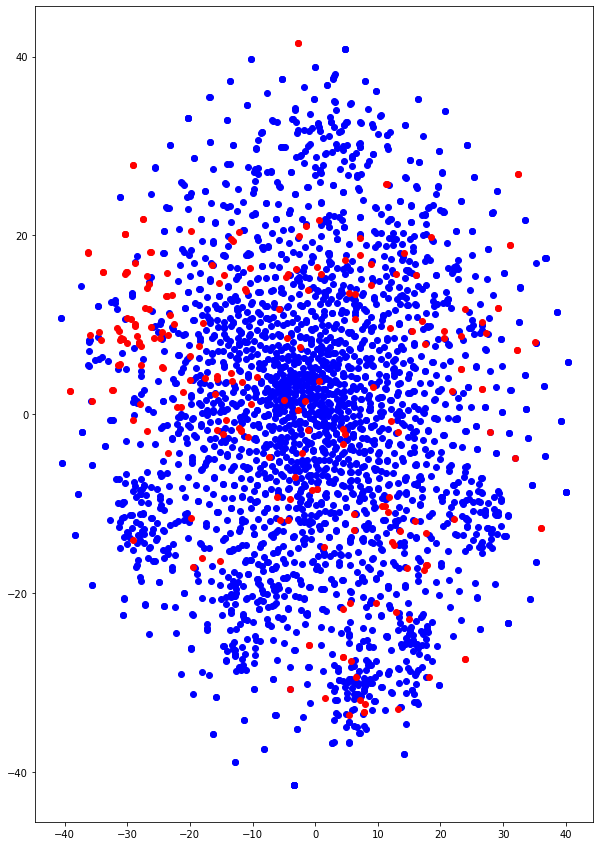

In [50]:
plotScatter(keyword="agriculture")

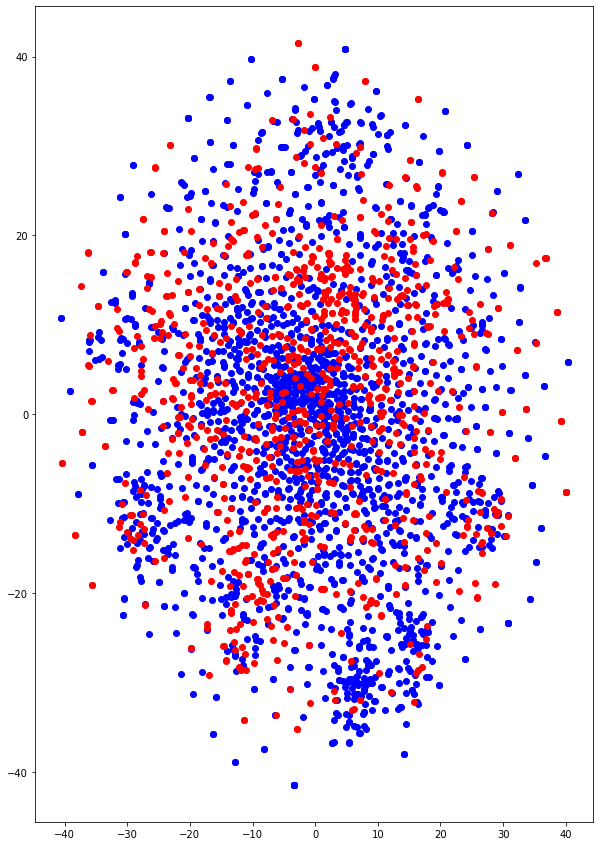

In [51]:
plotScatter(keyword="infrastructure")

# DBScan for Clustering

In [57]:
vecs = model.dv.vectors
print(vecs)

[[ 1.20470839e+01 -4.75776596e+01  3.60314560e+01 ... -4.38041592e+00
  -3.89588814e+01 -5.34389763e+01]
 [ 2.79250450e+01 -6.43220693e-02  4.70220070e+01 ...  4.60501442e+01
  -1.35965948e+01 -5.56186371e+01]
 [ 4.37441254e+01  1.92821312e+01 -1.52806597e+01 ...  1.14377579e+02
  -3.98696518e+01  1.13729563e+01]
 ...
 [ 3.35721283e+01 -6.29919100e+00  1.52767611e+01 ...  3.96019340e+00
  -2.15482712e+01 -3.97095375e+01]
 [ 4.01842537e+01 -7.76093216e+01 -1.50017700e+01 ...  9.01669846e+01
   3.42719765e+01  4.53432999e+01]
 [ 1.12057505e+01  1.57417555e+01  2.61394329e+01 ...  2.84200287e+01
  -2.17433796e+01 -1.55484657e+01]]


In [58]:
## Need to scale data for DBScan
X = StandardScaler().fit_transform(vecs)

In [78]:
db_model = DBSCAN(eps=15, min_samples=20)
db_model.fit(X)

DBSCAN(eps=15, min_samples=20)

In [79]:
db_model.labels_[db_model.labels_ == -1].size

40